## Observations and Insights 
While completing this assignment, I noticed that there seems to be a positive correlation between mouse weight and tumor volume. I also noticed that Capomulin and Ramicane regimens had the lowest average tumor volume. For the specific mouse that I chose (line graph), the tumor volume decreased significantly ove time.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

mouse_data_merged = pd.merge(mouse_metadata, study_results, on='Mouse ID')


# Display the data table for preview
mouse_data_merged.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.

len(mouse_data_merged)

total_mice = mouse_data_merged['Mouse ID'].nunique()
total_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

timepoint_groups = mouse_data_merged.groupby('Timepoint')

possible_dupes = pd.DataFrame(timepoint_groups['Mouse ID'].value_counts())
possible_dupes = possible_dupes.rename(columns={'Mouse ID':'Count'})

possible_dupes = possible_dupes.reset_index()

dupes = possible_dupes.loc[possible_dupes['Count'] > 1, 'Mouse ID'].unique()

dupes


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

dupe_data = mouse_data_merged.loc[mouse_data_merged['Mouse ID'] == 'g989', :]
dupe_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_data_clean = mouse_data_merged.drop(dupe_data.index)

mouse_data_clean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.

mouse_data_clean['Mouse ID'].nunique()




248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

regimen_group = mouse_data_clean.groupby('Drug Regimen')

tumor_volume = regimen_group['Tumor Volume (mm3)']

t_mean = tumor_volume.mean()
t_median = tumor_volume.median()
t_var = tumor_volume.var()
t_stdev = tumor_volume.std()
t_sem = tumor_volume.sem()


In [8]:
# Assemble the resulting series into a single summary dataframe.

merge_1 = pd.merge(t_mean, t_median, on='Drug Regimen')
merge_2 = pd.merge(t_var, t_stdev, on='Drug Regimen')
merge_3 = pd.merge(merge_1, merge_2, on='Drug Regimen')
summary_table = pd.merge(merge_3, t_sem, on='Drug Regimen')


summary_table = summary_table.rename(columns={'Tumor Volume (mm3)_x_x':'Mean Tumor Volume',
                                             'Tumor Volume (mm3)_y_x':'Median Tumor Volume',
                                             'Tumor Volume (mm3)_x_y': 'Tumor Volume Variance',
                                             'Tumor Volume (mm3)_y_y': 'Tumor Volume Standard Deviation',
                                             'Tumor Volume (mm3)': 'Tumor Volume SEM'})
summary_table = summary_table.reset_index()

summary_table

,Drug Regimen,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [9]:

# Using the aggregation method, produce the same summary statistics in a single line

summary_table_2 = tumor_volume.agg(['mean', 'median', 'var', 'std', 'sem']).reset_index()
summary_table_2

,Drug Regimen,mean,median,var,std,sem
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice Tested')

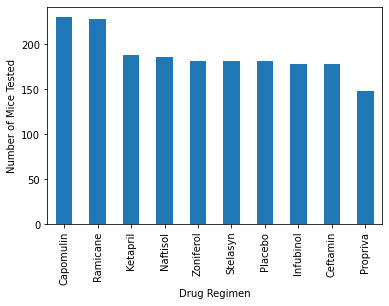

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
mice_per_regimen = regimen_group['Mouse ID'].count().sort_values(ascending = False)

mice_bar_1 = mice_per_regimen.plot(kind='bar')

mice_bar_1.set_ylabel('Number of Mice Tested')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

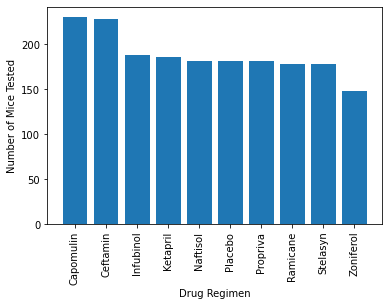

In [11]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot
drugs = summary_table['Drug Regimen']

plt.bar(drugs, mice_per_regimen)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.xticks(rotation=90)


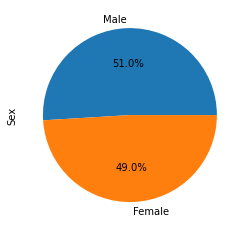

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

sex_dist = mouse_data_clean['Sex'].value_counts()

pie_sex = sex_dist.plot(kind='pie', autopct='%1.1f%%')


Text(0, 0.5, 'Sex')

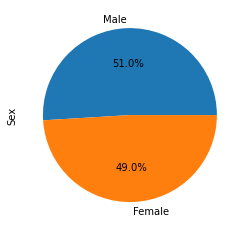

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ['Male', 'Female']

fig, ax = plt.subplots()
ax.pie(sex_dist, labels=labels, autopct="%1.1f%%")
ax.set_ylabel('Sex')


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

tvol_group = mouse_data_clean.groupby(['Drug Regimen', 'Mouse ID'])
max_timepoint = pd.DataFrame(tvol_group['Timepoint'].max())
max_timepoint = max_timepoint.reset_index()

max_timepoint = max_timepoint.rename(columns={'Timepoint': 'Greatest Timepoint'})


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

mouse_data_updated = pd.merge(mouse_data_clean, max_timepoint, how='left', on='Mouse ID')
mouse_data_updated = mouse_data_updated.drop(columns={'Drug Regimen_y'})
mouse_data_updated.head()

#tumor volume when timepoint = greatest timepoint

final_tvol_df = mouse_data_updated.loc[mouse_data_updated['Timepoint']== mouse_data_updated['Greatest Timepoint'],:]

final_tvol = final_tvol_df.loc[(final_tvol_df['Drug Regimen_x'] == 'Capomulin') |
                               (final_tvol_df['Drug Regimen_x'] == 'Ramicane') |
                               (final_tvol_df['Drug Regimen_x'] == 'Infubinol') |
                               (final_tvol_df['Drug Regimen_x'] == 'Ceftamin'), :]
final_tvol = final_tvol.rename(columns={'Drug Regimen_x':'Drug Regimen'})
final_tvol.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Greatest Timepoint
9,k403,Ramicane,Male,21,16,45,22.050126,1,45
19,s185,Capomulin,Female,3,17,45,23.343598,1,45
29,x401,Capomulin,Female,16,15,45,28.484033,0,45
39,m601,Capomulin,Male,22,17,45,28.430964,1,45
49,g791,Ramicane,Male,11,16,45,29.128472,1,45


In [15]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

for treatment in treatments:
    if treatment == treatments[0]:
        tvol_cap = final_tvol['Tumor Volume (mm3)'].loc[final_tvol['Drug Regimen'] == treatment]

    elif treatment == treatments[1]:
        tvol_ram = final_tvol['Tumor Volume (mm3)'].loc[final_tvol['Drug Regimen'] == treatment]
        
    elif treatment == treatments[2]:
        tvol_inf = final_tvol['Tumor Volume (mm3)'].loc[final_tvol['Drug Regimen'] == treatment]
        
    elif treatment == treatments[3]:
        tvol_ceft = final_tvol['Tumor Volume (mm3)'].loc[final_tvol['Drug Regimen'] == treatment]
        

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles_cap = tvol_cap.quantile([.25,.5,.75])   
quartiles_ram = tvol_ram.quantile([.25,.5,.75])  
quartiles_inf = tvol_inf.quantile([.25,.5,.75])   
quartiles_ceft = tvol_ceft.quantile([.25,.5,.75])

   
  
 # add subset 
lowerq_cap = quartiles_cap[0.25]
upperq_cap = quartiles_cap[0.75]
iqr_cap = upperq_cap-lowerq_cap
lower_bound_cap = lowerq_cap - (1.5*iqr_cap)
upper_bound_cap = upperq_cap + (1.5*iqr_cap)


lowerq_ram = quartiles_ram[0.25]
upperq_ram = quartiles_ram[0.75]
iqr_ram = upperq_ram-lowerq_ram
lower_bound_ram = lowerq_ram - (1.5*iqr_ram)
upper_bound_ram = upperq_ram + (1.5*iqr_ram)


lowerq_inf = quartiles_inf[0.25]
upperq_inf = quartiles_inf[0.75]
iqr_inf = upperq_inf-lowerq_inf
lower_bound_inf = lowerq_inf - (1.5*iqr_inf)
upper_bound_inf = upperq_inf + (1.5*iqr_inf)

lowerq_ceft = quartiles_ceft[0.25]
upperq_ceft = quartiles_ceft[0.75]
iqr_ceft = upperq_ceft-lowerq_ceft
lower_bound_ceft = lowerq_ceft - (1.5*iqr_ceft)
upper_bound_ceft = upperq_ceft + (1.5*iqr_ceft)

    # Determine outliers using upper and lower bounds
outliers_cap = [volume for volume in tvol_cap if volume < lower_bound_cap or volume > upper_bound_cap]
print(f'Capomulin has {len(outliers_cap)} potential outliers as follows: {(outliers_cap)}')

outliers_ram = [volume for volume in tvol_ram if volume < lower_bound_ram or volume > upper_bound_ram]
print(f'Ramicane has {len(outliers_ram)} potential outliers as follows:{(outliers_ram)}')

outliers_inf = [volume for volume in tvol_inf if volume < lower_bound_inf or volume > upper_bound_inf]
print(f'Infubinol has {len(outliers_inf)} potential outliers as follows:{(outliers_inf)}')

outliers_ceft = [volume for volume in tvol_ceft if volume < lower_bound_ceft or volume > upper_bound_ceft]
print(f'Ceftamin has {len(outliers_ceft)} potential outliers as follows: {(outliers_ceft)}')


    


Capomulin has 0 potential outliers as follows: []
Ramicane has 0 potential outliers as follows:[]
Infubinol has 1 potential outliers as follows:[36.321345799999996]
Ceftamin has 0 potential outliers as follows: []


([<matplotlib.axis.XTick at 0x7ff8357d9130>,
 [Text(0, 0, 'Capomulin'),
  Text(0, 0, 'Ramicane'),
  Text(0, 0, 'Infubinol'),
  Text(0, 0, 'Ceftamin')])

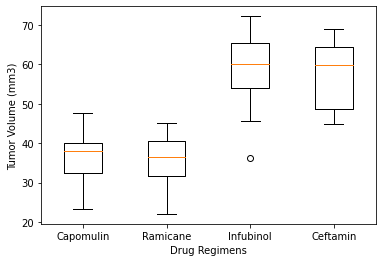

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig, (ax1) = plt.subplots()

ax1.boxplot(x = [tvol_cap, tvol_ram, tvol_inf, tvol_ceft])
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.set_xlabel("Drug Regimens")
plt.xticks([1, 2, 3, 4], treatments)



## Line and Scatter Plots

Text(0.5, 0, 'Timepoint')

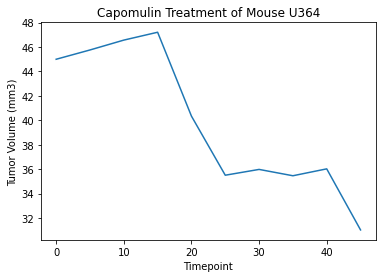

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#picked a Mouse ID at random from mouse_data_clean

camp_mouse = mouse_data_clean.loc[mouse_data_clean['Mouse ID'] == 'u364']

x = camp_mouse['Timepoint']
y = camp_mouse['Tumor Volume (mm3)']

mouse_line, = plt.plot(x,y)
plt.title('Capomulin Treatment of Mouse U364')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint')

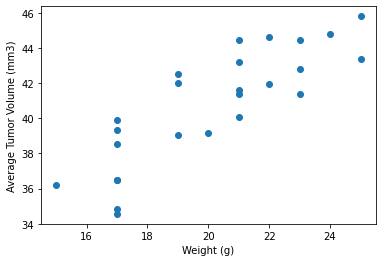

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap = mouse_data_clean.loc[mouse_data_clean['Drug Regimen'] == 'Capomulin' ]
cap_group = cap.groupby('Mouse ID').mean()
weight_mean = cap_group['Weight (g)']
volume_mean = cap_group['Tumor Volume (mm3)']

mouse_scatter = plt.scatter(weight_mean, volume_mean)
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is : 0.84


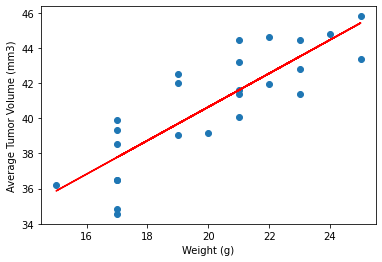

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

mouse_scatter = plt.scatter(weight_mean, volume_mean)
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")



(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight_mean, volume_mean)
regress_values = weight_mean * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
plt.plot(weight_mean,regress_values,"r-")
print(f'The correlation between mouse weight and the average tumor volume is : {round(rvalue, 2)}')
plt.show()
